# Scikit Learn
La API de Scikit-Learn destaca por su diseño, estos principios son:

## Scikit-Learn Design

### Consistencia
Todos los objetos comparten una interfaz consistente y simple:
* **Estimators**. Cualquier objeto que puede estimar algunos parámetros basados en un conjunto de datos se llama **estimador**. La estimación en sí se realiza mediante el método `fit()`, y solo toma un conjunto de datos como parámetro (o dos para los algoritmos de aprendizaje supervisado; el segundo conjunto de datos contiene las *etiquetas*). Cualquier otro parámetro necesario para guiar el proceso de estimación se considera un **hiperparámetro**.

* **Transformers**. Algunos estimadores también pueden transformar un conjunto de datos; estos se llaman **transformadores**. La transformación la realiza el método `transform()` con el conjunto de datos a transformar como parámetro y devuelve el conjunto de datos transformado.
Todos los transformadores también tienen un método conveniente llamado `fit_transform()` que es equivalente a llamar a `fit()` y luego a `transform()` (pero a veces `fit_transform()` está optimizado y se ejecuta mucho más rápido).

* **Predictors**. Algunos *estimadores* son capaces de hacer predicciones dado un conjunto de datos; se llaman *predictores*. Un predictor tiene un método `predict()` que toma un conjunto de datos de nuevas instancias y devuelve un conjunto de datos de las predicciones correspondientes. También tiene un método `score()` que mide la calidad de las predicciones dado un conjunto de prueba (y las etiquetas correspondientes en el caso de algoritmos de aprendizaje supervisado).



### Inspection
Se puede acceder directamente a todos los **hiperparámetros del estimador** a través de variables de instancia pública (p. ej., `imputer.strategy`), y también se puede acceder a todos los **parámetros aprendidos** del estimador a través de variables de instancia pública con un sufijo de subrayado (p. ej., `imputer.statistics_`).

### Nonproliferation of classes
Los conjuntos de datos se representan como matrices *NumPy* o *SciPy*. Los hiperparámetros son solo cadenas o números regulares de Python.

### Sensible defaults
Scikit-Learn proporciona valores predeterminados razonables para la mayoría de los parámetros, lo que facilita la creación rápida de un sistema de trabajo básico.

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

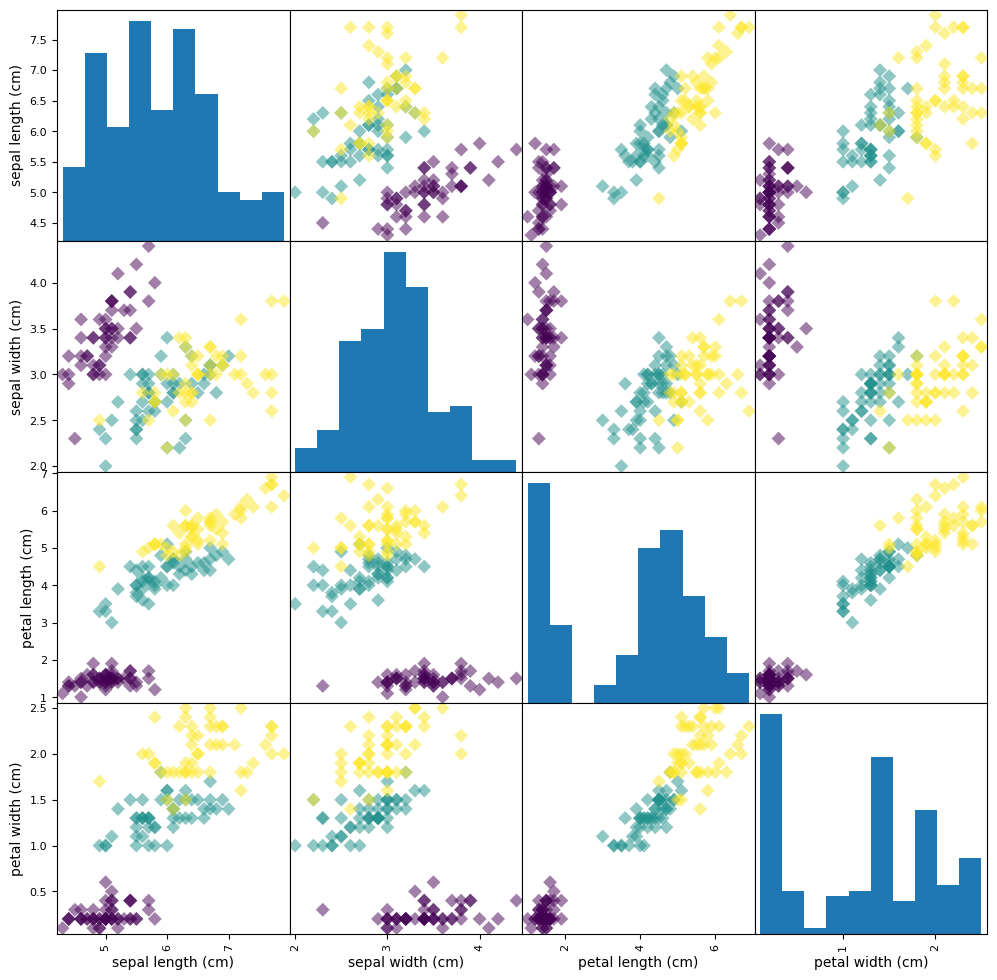

In [1]:
from sklearn import datasets # Cargar datasets
from pandas.plotting import scatter_matrix
import pandas as pd
# https://scikit-learn.org/stable/datasets/toy_dataset.html

iris = datasets.load_iris()
#print(iris.keys())
df = pd.DataFrame(iris.data, columns = iris.feature_names)
#df.head()
scatter_matrix(df, c = iris.target, figsize = [12,12], s=50, marker = 'D')

In [ ]:
iris

In [6]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
from sklearn.model_selection import train_test_split # Separar en train y test

y = iris['target'] # clases
X_train, X_test, y_train, y_test = train_test_split(iris['data'], y, test_size=0.3, random_state=21, stratify=y)
# stratify: data is split in a stratified fashion, using this as the class labels
X_train.shape

(105, 4)

In [7]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Machine Learning models

## Nearest centroid classifier (Minimum Distance)

Each class is represented by its centroid, with test samples classified to the class with the nearest centroid.

In [9]:
from sklearn.neighbors import NearestCentroid

md = NearestCentroid() # 1 Creamos el modelo por default
md.fit(X_train, y_train) # 2 Entrenamos

y_pred = md.predict(X_test) # 3 Predicciones
print("Test set predictions using Min. Dist: ",format(y_pred)) # What's the actual output

Test set predictions using Min. Dist:  [2 1 2 2 1 0 1 0 0 2 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 2 2 2
 1 1 2 1 1 0 2 1]


In [10]:
from sklearn.metrics import accuracy_score # print the accuracy of the trained model

accuracy_score(y_test, y_pred)

0.9111111111111111

## KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier # Clasificador Scikit Learn

knn = KNeighborsClassifier(n_neighbors=3) # k = 3
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Test set predictions using KNN: ",format(y_pred)) # What's the actual output

Test set predictions using KNN:  [2 2 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [12]:
accuracy_score(y_test, y_pred)

0.9777777777777777

## Decision Trees

In [13]:
from sklearn.tree import DecisionTreeClassifier # Importamos
dt = DecisionTreeClassifier() # 1.- Creamos el modelo, sin restricciones en el árbol

dt.fit(X_train, y_train) # 2.- Entrenamos

# 3.- Predicciones
y_test_pred = dt.predict(X_test)
y_train_pred = dt.predict(X_train)

test_acc = accuracy_score(y_test_pred, y_test)
train_acc = accuracy_score(y_train_pred, y_train)
print('% de aciertos sobre el set de prueba: ', test_acc)
print('% de aciertos sobre el set de entrenamiento: ', train_acc)

% de aciertos sobre el set de prueba:  0.9777777777777777
% de aciertos sobre el set de entrenamiento:  1.0


# Overfitting and underfitting
The following cell computes and plots the training and testing accuracy scores for a variety of different neighbor values in order to develop the intuition for overfitting and underfitting.

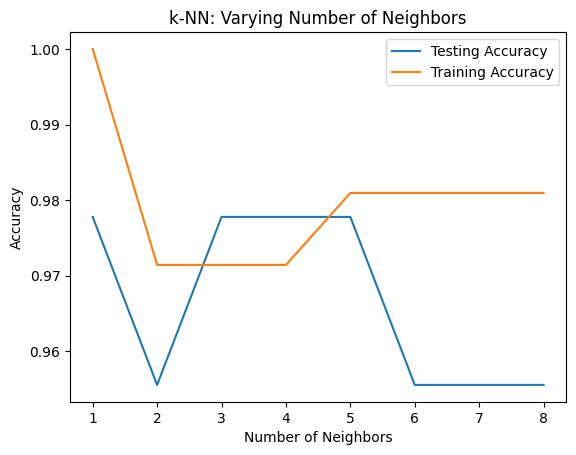

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# K-Nearest Neighbours
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

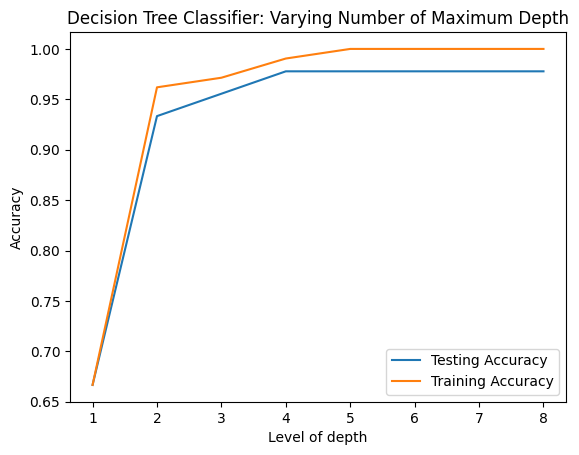

In [15]:
# Decision Tree
# Setup arrays to store train and test accuracies
depths = np.arange(1, 9) # We will try different depth settings, but we can also try with other parameters (min_samples_leaf, etc)
train_accuracy = np.empty(len(depths))
test_accuracy = np.empty(len(depths))

# Loop over different values of depth
for i, k in enumerate(depths):
    # Setup a Decision Tree Classifier with maximum depth
    dt = DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    dt.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = dt.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = dt.score(X_test, y_test)

# Generate plot
plt.title('Decision Tree Classifier: Varying Number of Maximum Depth')
plt.plot(depths, test_accuracy, label = 'Testing Accuracy')
plt.plot(depths, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Level of depth')
plt.ylabel('Accuracy')
plt.show()

# Conclusiones
Para cada clasificador considera las siguientes conclusiones:
* ¿Hay Overfitting?
* ¿Hay Underfitting?
* ¿Se pueden identificar las variables más importantes?
* ¿Cómo se interpretan los resultados de su visualización? (si aplica)

En general, ¿cuál tiene mejor desempeño?

